In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time
import sys
from loki import RingData #https://github.com/dermen/loki

In [2]:
run = 'SilverBehenate_powderCalibration'
h5path = '/sf/bernina/data/p17743/res/work/hdf5/%s.h5'%run
h5file = h5py.File(h5path,'r')

In [3]:
img = h5file['JF7/2D_sum_hits']
hits = h5file['JF7/num_hits'].value
nshots = h5file['JF7/num_shots'].value

In [43]:
center_guess = [2120,2225] #intital guess for center
peak_radius_guess = 190#2302-center_guess[0]
ring_param_guess = ( center_guess[0], center_guess[1], peak_radius_guess )

<IPython.core.display.Javascript object>


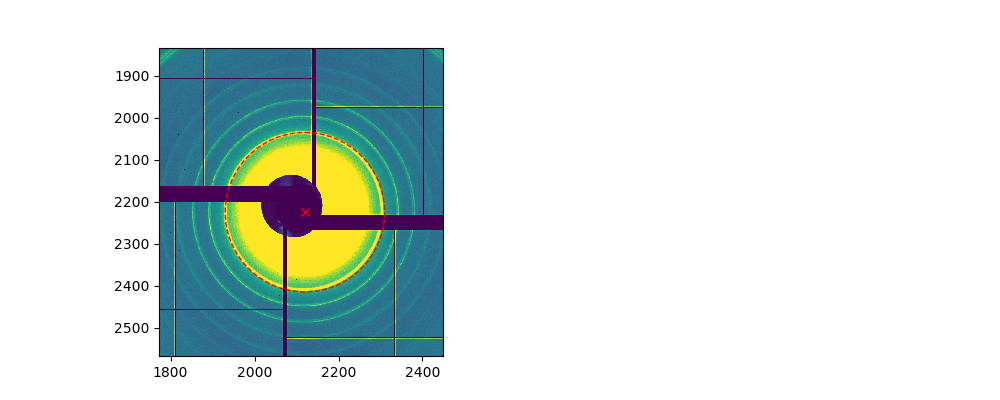

In [47]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
ax = plt.gca()
plt.plot(center_guess[0],center_guess[1],'rx')
circ = plt.Circle( xy=(center_guess[0], center_guess[1]), radius=peak_radius_guess, lw=1, fc='none', ls='dashed' ,color='r')
ax.imshow(img/hits, interpolation='nearest',clim=[0,10])
ax.add_patch( circ)
#plt.colorbar()

plt.show()

In [45]:
RF = RingData.RingFit(img)
x_center,y_center,peak_radius = RF.fit_circle_slow( ring_param_guess, 
                                            ring_scan_width=4, 
                                            center_scan_width=4, 
                                            resolution=1 )

/mnt/das-gpfs/home/ext-perakis_f/.local/lib/python3.6/site-packages/loki/RingData/RadialProfile.py:79: RuntimeWarning: invalid value encountered in true_divide
  self.num_pixels_per_radial_bin


<IPython.core.display.Javascript object>


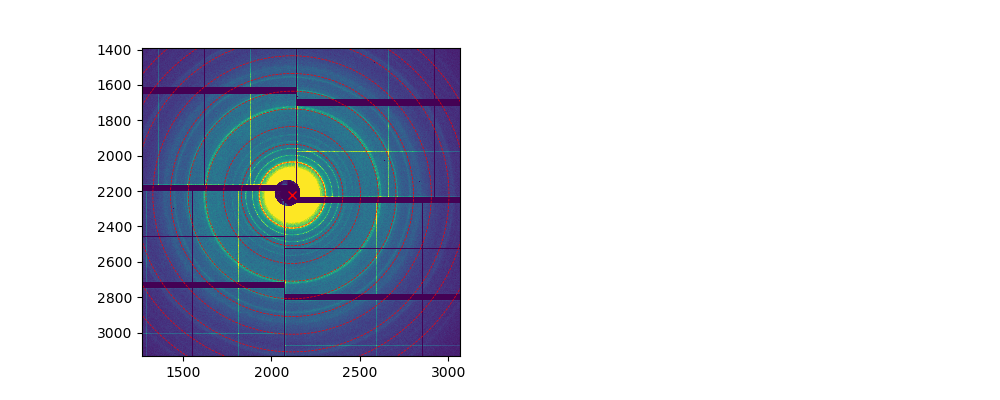

In [56]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
ax = plt.gca()
plt.plot(x_center,y_center,'rx')
#circ = plt.Circle( xy=(x_center, y_center), radius=peak_radius, lw=1, fc='none', ls='dashed' ,color='r')
#ax.add_patch( circ)

for i in range(10):
    circ = plt.Circle( xy=(x_center, y_center), radius=peak_radius+i*100, lw=0.5, fc='none', ls='dashed' ,color='r')
    ax.add_patch( circ)

ax.imshow(img/hits, interpolation='nearest',clim=[0,10])
plt.savefig('%s_ring_fit.png' % run)
plt.show()

In [54]:
print(x_center,y_center)

2117.22222222 2222.22222222
